In [204]:
import pandas as pd
import numpy as np
from combine_data import combine_data
from data_processing import ADC_to_v,format_timestamps
import librosa
import os,shutil
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [403]:


raw_data,labels,time_stamps = combine_data('./../data/al_data')
labels -=1

C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\combine_data.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)
C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\combine_data.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  time_stamps = np.array(time_stamps)


In [404]:
voltage_values = []
time = []
for i in raw_data:
    voltage_values.append(ADC_to_v(i))
for i in time_stamps:
    time.append(format_timestamps(i))

In [567]:
n_sample = 50

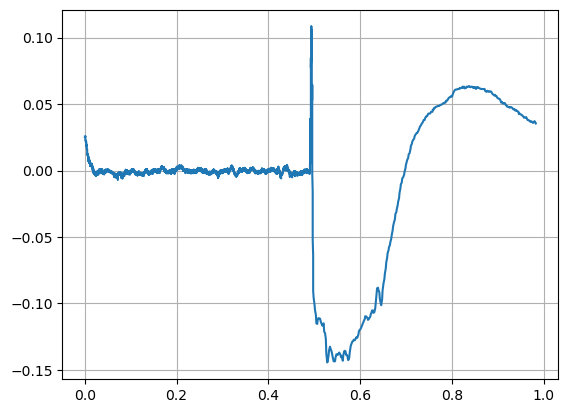

In [568]:
plt.plot(time[n_sample],voltage_values[n_sample])
plt.grid()

In [407]:
from librosa import display

In [408]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filter(voltage_values,low_cut=1,high_cut=55,fs = 1e3,):
    '''
    band pass filter based on the scipy butter bandpass, allowing frequency between low cut and high cut to pass through.
    input : np.array of the data voltage values.
    low_cut : lowest frequency defaults at 1
    high cut : highest frequency in the band filter defaults at 55.
    '''
    return butter_bandpass_filter(voltage_values,lowcut=low_cut,highcut=high_cut,fs = fs)

In [409]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [410]:
from scipy.fft import fft, fftfreq
fft_vals = abs(fft(voltage_values[n_sample],n=16))
fft_vals

array([0.12175798, 0.00612011, 0.0020536 , 0.00159875, 0.00043964,
       0.00069025, 0.00176762, 0.00286385, 0.00043964, 0.00286385,
       0.00176762, 0.00069025, 0.00043964, 0.00159875, 0.0020536 ,
       0.00612011], dtype=float32)

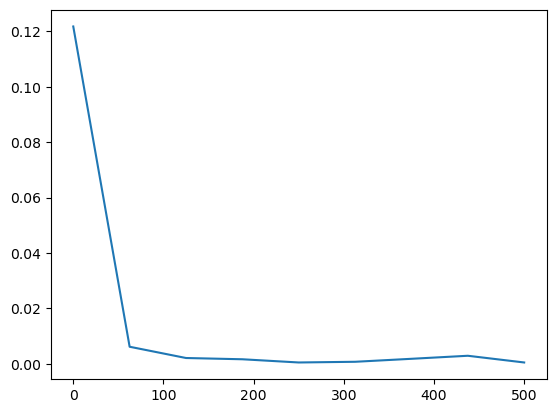

In [411]:
plt.plot(librosa.fft_frequencies(sr=1000, n_fft=16),fft_vals[:len(fft_vals)//2+1])

In [412]:
filtered = butter_bandpass_filter(voltage_values[n_sample],1,40,1000)

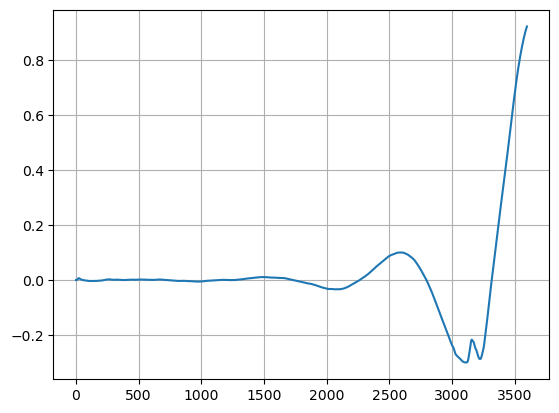

In [413]:
plt.plot(filtered)
plt.grid()

In [382]:
from scipy.integrate import cumtrapz

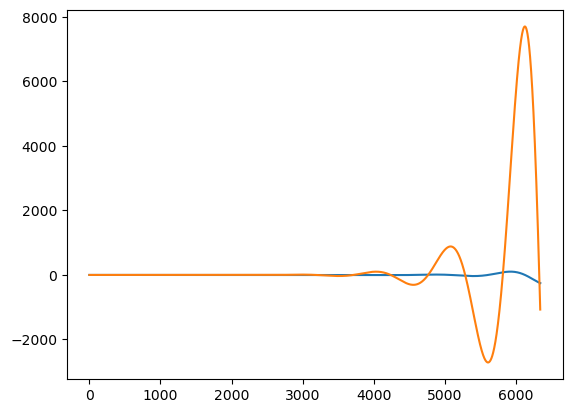

In [383]:
plt.plot((filtered))
plt.plot(1/np.pi * cumtrapz(filtered))

In [219]:
from feature_extraction import *

In [544]:
filtered_values = []
for i in voltage_values:
    filtered_values.append(filter(i,high_cut=60))

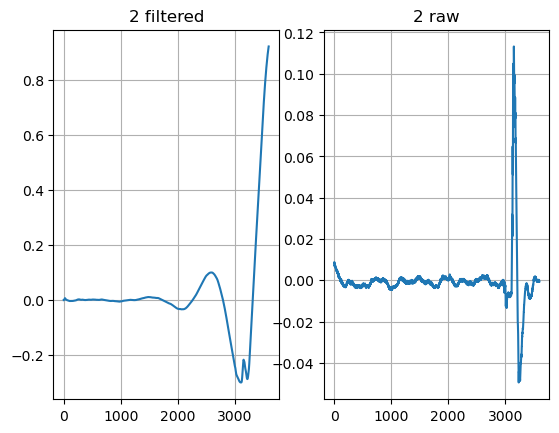

In [545]:

plt.subplot(1,2,1)
plt.title(f"{labels[n_sample]} filtered")
plt.plot(filtered)
plt.grid()
plt.subplot(1,2,2)
plt.title(f"{labels[n_sample]} raw")
plt.plot(voltage_values[n_sample])
plt.grid()

In [573]:
features = [root_mean_squared,iemg,mean_absolute_value,variance,wave_form_length,mean,median,skewness,kurt,zero_crossing_rate]
df = extract_features(raw_data,label = labels,features_no=3,overlapping_percentage=0.25,features_funcs=features)


                                root_mean_squared  \
0     [3379.2437, 3411.863, 3406.6392, 3409.9668]   
1     [3391.812, 3408.4663, 3412.9492, 3413.2078]   
2      [3413.3484, 3411.294, 3412.173, 3413.8281]   
3    [3406.1406, 3411.8113, 3415.8284, 3410.8625]   
4      [3390.087, 3409.3113, 3410.208, 3463.3538]   
..                                            ...   
173   [3375.3804, 3413.535, 3410.0178, 3407.0525]   
174   [3395.5527, 3416.8975, 3412.8804, 3406.156]   
175  [3394.6914, 3411.5532, 3405.6045, 3400.7778]   
176  [3384.4497, 3411.6562, 3414.9663, 3414.5703]   
177  [3399.7764, 3413.1042, 3407.8801, 3406.3972]   

                                         iemg  \
0    [195996.0, 197888.0, 197585.0, 197778.0]   
1    [196725.0, 197691.0, 197951.0, 197966.0]   
2    [197974.0, 197855.0, 197906.0, 198002.0]   
3    [197555.0, 197885.0, 198118.0, 197830.0]   
4    [196625.0, 197740.0, 197792.0, 200873.0]   
..                                        ...   
173  [195772.0, 1979

C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\feature_extraction.py:80: UserWarning: needs fixing the results might be wrong.
  warnings.warn("needs fixing the results might be wrong.")


In [575]:
df

,root_mean_squared1,root_mean_squared2,root_mean_squared3,root_mean_squared4,iemg1,iemg2,iemg3,iemg4,mean_absolute_value1,mean_absolute_value2,...,skewness4,kurt1,kurt2,kurt3,kurt4,zero_crossing_rate1,zero_crossing_rate2,zero_crossing_rate3,zero_crossing_rate4,label
0,3379.243652,3411.863037,3406.639160,3409.966797,195996.0,197888.0,197585.0,197778.0,3379.241455,3411.862061,...,-0.024862,-0.702066,-1.161831,-0.531756,-0.900287,0.0,0.0,0.0,0.0,0
1,3391.812012,3408.466309,3412.949219,3413.207764,196725.0,197691.0,197951.0,197966.0,3391.810303,3408.465576,...,0.002004,0.936771,-0.615031,-0.916849,-0.745540,0.0,0.0,0.0,0.0,1
2,3413.348389,3411.293945,3412.173096,3413.828125,197974.0,197855.0,197906.0,198002.0,3413.344727,3411.293213,...,0.046545,-1.015741,-1.481961,-0.946254,-1.076921,0.0,0.0,0.0,0.0,2
3,3406.140625,3411.811279,3415.828369,3410.862549,197555.0,197885.0,198118.0,197830.0,3406.120605,3411.810303,...,0.114493,-0.942629,-0.822563,-1.062228,-1.070433,0.0,0.0,0.0,0.0,0
4,3390.086914,3409.311279,3410.208008,3463.353760,196625.0,197740.0,197792.0,200873.0,3390.086182,3409.310303,...,-0.812450,-0.770584,-0.888588,-0.852306,-0.644642,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3375.380371,3413.534912,3410.017822,3407.052490,195772.0,197985.0,197781.0,197609.0,3375.379395,3413.534424,...,-0.046288,-0.598402,-0.926744,-1.429663,-0.409231,0.0,0.0,0.0,0.0,1
174,3395.552734,3416.897461,3412.880371,3406.156006,196942.0,198180.0,197947.0,197557.0,3395.551758,3416.896484,...,-0.375936,-1.041103,-0.538176,-0.309013,-0.868530,0.0,0.0,0.0,0.0,2
175,3394.691406,3411.553223,3405.604492,3400.777832,196892.0,197870.0,197525.0,197245.0,3394.689697,3411.551758,...,-0.276784,-0.935458,-0.873205,-1.318136,-0.372112,0.0,0.0,0.0,0.0,0
176,3384.449707,3411.656250,3414.966309,3414.570312,196298.0,197876.0,198068.0,198045.0,3384.448242,3411.655273,...,-0.031222,-0.897392,-0.705073,-0.894789,-0.782341,0.0,0.0,0.0,0.0,1


In [576]:
import seaborn as sns
from sklearn.decomposition import PCA

In [577]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale,normalize,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [578]:
X,y = df.drop('label',axis = 1),df['label']
X_scaled =minmax_scale(X)

In [579]:
pca = PCA(n_components=25)
pca.fit(X_scaled)
components = pca.transform(X_scaled)

In [580]:
x_train,x_test,y_train,y_test = train_test_split(components,y,train_size=0.7)
x_train.shape

(124, 25)

In [581]:
# parameter 1 
encoding_dim = 100
# ncol # without the label column
ncol = x_train.shape[1:][0]
ncol

25

In [582]:
model = Sequential()
model.add(keras.layers.Input(shape=x_train.shape[1:]))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(24))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(6))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3,activation = 'softmax'))

In [583]:
loss_fn = loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=loss_fn,metrics = ['accuracy'],)

In [584]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 100)               2600      
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_134 (Dense)           (None, 24)                2424      
                                                                 
 dropout_30 (Dropout)        (None, 24)                0         
                                                                 
 dense_135 (Dense)           (None, 6)                 150       
                                                                 
 dropout_31 (Dropout)        (None, 6)                 0         
                                                                 
 dense_136 (Dense)           (None, 3)               

In [589]:
model.fit(x = x_train,y=y_train,validation_split=0.3,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 41ms/step - loss: 0.4743 - accuracy: 0.8023 - val_loss: 1.8979 - val_accuracy: 0.5263
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4319 - accuracy: 0.8372 - val_loss: 1.9074 - val_accuracy: 0.5263
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4959 - accuracy: 0.8023 - val_loss: 1.9173 - val_accuracy: 0.5526
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 0.5137 - accuracy: 0.7907 - val_loss: 1.9189 - val_accuracy: 0.5526
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4558 - accuracy: 0.8140 - val_loss: 1.9219 - val_accuracy: 0.5526
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4312 - accuracy: 0.7907 - val_loss: 1.9220 - val_accuracy: 0.5526
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4804 - accuracy: 0.7558 - val_loss: 1.9194 - val_accuracy: 0.5526
Epoch 8/100
3/3 [===

In [595]:
from sklearn.svm import SVC

In [596]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [600]:
predictions_ann = np.argmax(model.predict(x_test),axis=1)
predictions_svc = svm.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test,y_pred=predictions_svc))

              precision    recall  f1-score   support

           0       0.37      0.59      0.45        17
           1       0.44      0.37      0.40        19
           2       1.00      0.61      0.76        18

    accuracy                           0.52        54
   macro avg       0.60      0.52      0.54        54
weighted avg       0.60      0.52      0.54        54



In [598]:
import inspect

In [599]:
print(inspect.getsource(ADC_to_v))

def preprocess_data(filepath):
    """Loads data from file and returns processed data."""
    #df = pd.read_csv('./../data', delimiter=r"\s+")
    data,labels,time_stamps = combine_data('./../data') #call the function combine_data with the correct file path. ./../data -> from current directory / go back / go to 'data'
    # To Do
    # scale the data and return the scaled data
    for i in range(len(data)):
        max = np.max(data[i][0])                                    #Saves the maximum value of each data file
        min = np.min(data[i][0])                                    #Saves the minimum value of each data file
        diff = max - min                                            #Saves the difference
        min_vector = np.ones(len(data[i][0])) * min                 #Creates a vector of only 1 with the correct length and multiplies it with the minimum value
        data[i][0]= (2 * (data[i][0] - min_vector)/diff)-1          #Normalize the entire vector within the range of